#

In [1]:
%load_ext autoreload
%autoreload 2

from strategies.registry import STRATEGIES

# from trading_system.system_development.strategies.trend_pullback_v1.run_backtest import run_backtest_for_default_universe
# from trading_system.system_development.strategies.trend_pullback_v1.config import StrategyParams


=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
0    996
1    103
Name: count, dtype: int64

Exit breakdown for ^GSPC:
  All trades       :   49 trades, avg holding   0.45 days
  stop          :   17 trades, avg holding   0.74 days
  trend_exit    :   29 trades, avg holding   0.18 days
  tp            :    3 trades, avg holding   1.49 days


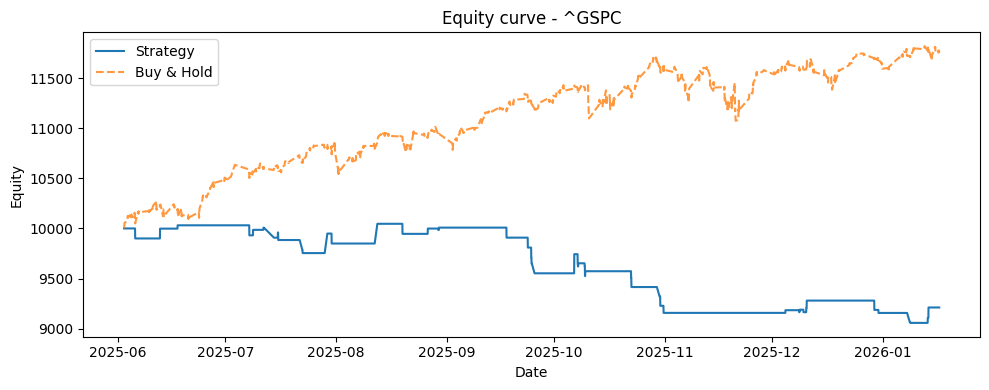


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
0    1004
1      95
Name: count, dtype: int64

Exit breakdown for ^NDX:
  All trades       :   49 trades, avg holding   0.43 days
  stop          :   18 trades, avg holding   0.62 days
  tp            :    6 trades, avg holding   1.19 days
  trend_exit    :   25 trades, avg holding   0.12 days


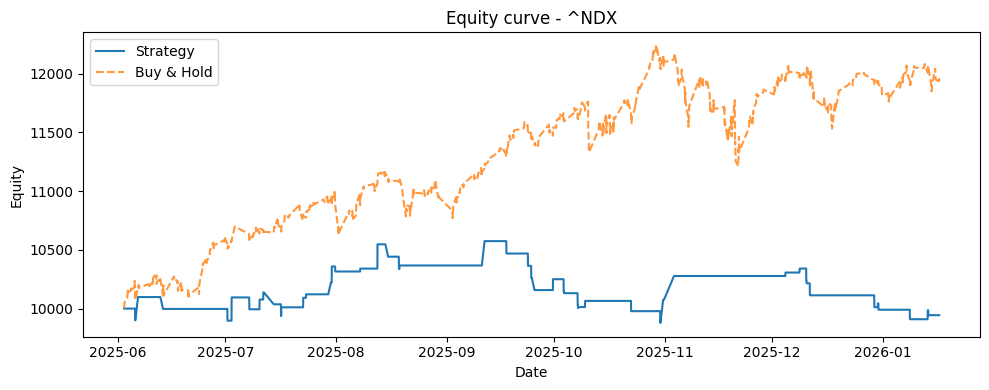


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
0    1306
1     130
Name: count, dtype: int64

Exit breakdown for ^FTSE:
  All trades       :   52 trades, avg holding   0.65 days
  tp            :   13 trades, avg holding   1.11 days
  trend_exit    :   23 trades, avg holding   0.37 days
  stop          :   16 trades, avg holding   0.68 days


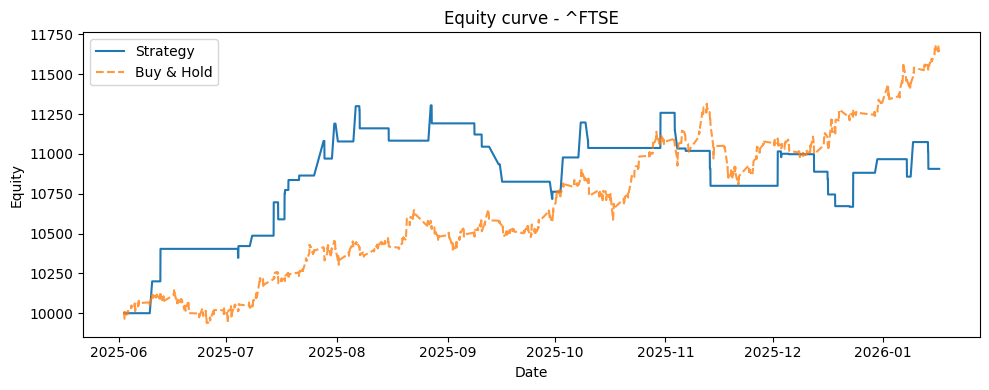


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    3472
 1     232
-1     189
Name: count, dtype: int64

Exit breakdown for EURUSD=X:
  All trades       :  199 trades, avg holding   0.14 days
  stop          :   66 trades, avg holding   0.14 days
  tp            :   43 trades, avg holding   0.29 days
  trend_exit    :   90 trades, avg holding   0.07 days


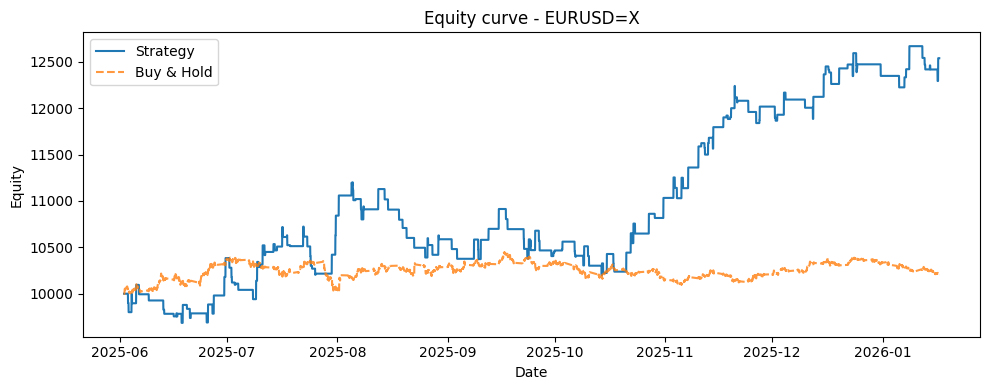


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 12538.1457
total_return_pct    :    25.38%
max_drawdown_pct    :    -8.94%
num_trades          : 349.0000
win_rate_pct        :    43.27%
avg_win             : 122.7156
avg_loss            : -82.9750
profit_factor       :   1.1631
sharpe_ratio        :   1.6181


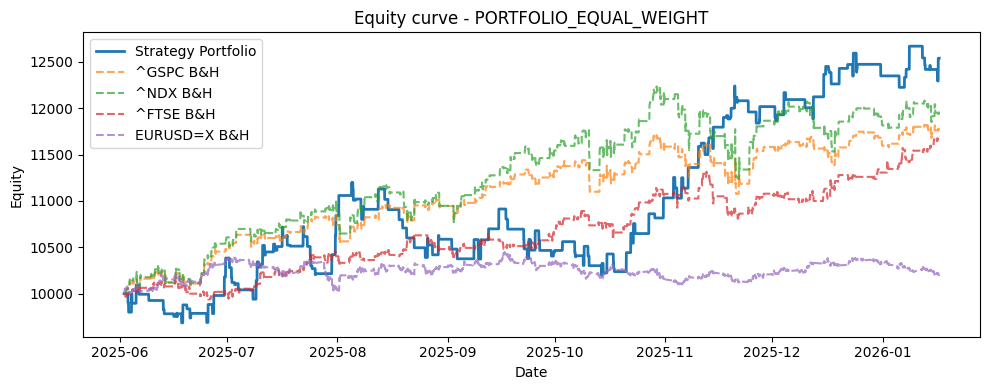


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 9210.4949
total_return_pct    :    -7.90%
max_drawdown_pct    :    -9.85%
num_trades          :  49.0000
win_rate_pct        :    40.82%
avg_win             :  66.0111
avg_loss            : -72.7492
profit_factor       :   0.6258
sharpe_ratio        :  -3.1247

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 9943.8874
total_return_pct    :    -0.56%
max_drawdown_pct    :    -6.58%
num_trades          :  49.0000
win_rate_pct        :    46.94%
avg_win             :  93.6957
avg_loss            : -85.0428
profit_factor       :   0.9746
sharpe_ratio        :  -0.1004

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 10906.3402
total_return_pct    :     9.06%
max_drawdown_pct    :    -5.63%
num_trades          :  52.0000
win_rate_pct        :    42.31%
avg_win             : 152.7906
avg_loss            : -81.83

In [2]:
if __name__ == "__main__":

    name = "trend_pullback_v1" #"trend_pullback_v1" "breakout_v1"
    run_fn, ParamsCls = STRATEGIES[name]

    params_cash = ParamsCls(
        entry_mode="shallow_pullback",
        equity_mode="cash",
        exit_mode="fixed_rr",
        tp_atr_mult=2,
        risk_per_trade=0.01,
    )

    results_cash = run_fn(
        params=params_cash,
        start="2025-6-01",
        end=None,
        interval="1h",
        plot=True,
        portfolio=True,
        show_benchmark=True,
    )


In [4]:
 # %load_ext autoreload
# %autoreload 2
#
# from trading_system.system_development.strategies.breakout_v1.config import StrategyParams
# from trading_system.system_development.strategies.breakout_v1.run_backtest import run_backtest_for_default_universe
#
#
# params = StrategyParams(
#     donchian_lookback=20,
#     vol_lookback=50,
#     low_vol_mult=0.8,
#     risk_per_trade=0.01,
#     equity_mode="mtm",
#     long_only=True,
# )
#
# results = run_backtest_for_default_universe(
#     params=params,
#     start="2024-01-01",
#     end=None,
#     interval="4h",
#     plot=True,
#     portfolio=True,
#     show_benchmark=True,
# )

# Debug

In [ ]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].tail()
